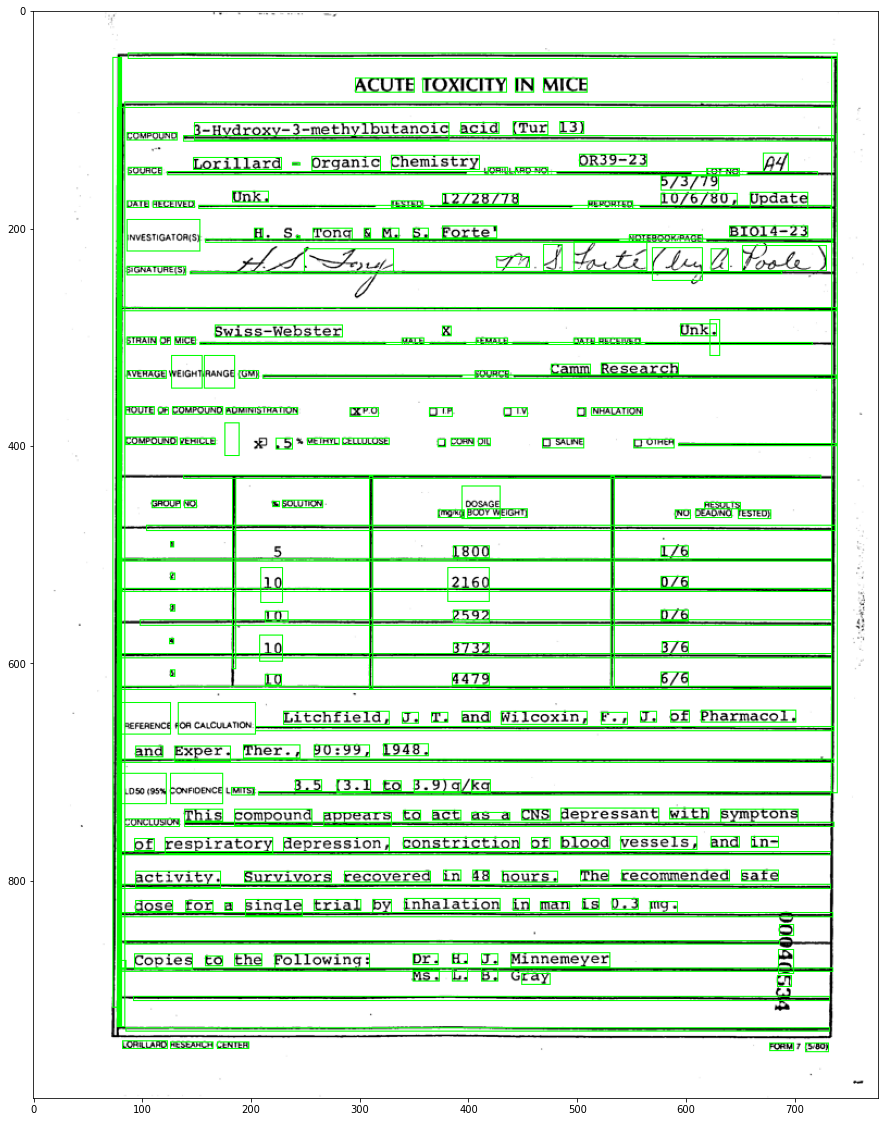

In [1]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from pytesseract import Output

pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
tessdata_dir_config = '--tessdata-dir "C:/Program Files/Tesseract-OCR/tessdata"'
image = cv2.imread("./dataset/training_data/images/00040534.png") 

def display_img(img):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

def bounding_box(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    im2 = img.copy()
    d = pytesseract.image_to_data(im2, output_type=Output.DICT, config=tessdata_dir_config)

    n_boxes = len(d['level'])
    for i in range(n_boxes):
        if(d['text'][i] != ""):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 1)

    display_img(im2)

bounding_box(image)